In [28]:
"""
 Basic imgae load, plot, resize, etc..
 Sungjoon Choi (sungjoon.choi@cpslab.snu.ac.kr)
"""
# Import packs
import numpy as np
import os

from imageio import imread
import matplotlib.pyplot as plt
import skimage.io
import skimage.transform
from skimage.transform import resize
# import tensorflow as tf

%matplotlib inline  

print ("Packs loaded")

Packs loaded


In [14]:
# Print Current Folder 
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) ) 

# Useful function
def print_typeshape(img):
    print("Type is %s" % (type(img)))
    print("Shape is %s" % (img.shape,))

Current folder is d:\work\ML\jupyter\Tensorflow-101\notebooks


# Load & plot

Type is <class 'imageio.core.util.Array'>
Shape is (1026, 1368, 3)


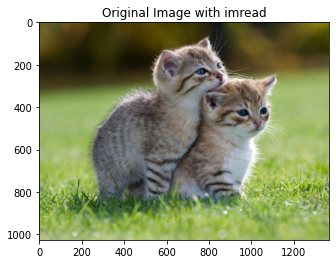

In [15]:
# Load 
cat = imread(cwd + "/images/cat.jpg")
print_typeshape(cat)
# Plot
plt.figure(0)
plt.imshow(cat)
plt.title("Original Image with imread")
plt.draw()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Type is <class 'imageio.core.util.Array'>
Shape is (1026, 1368, 3)


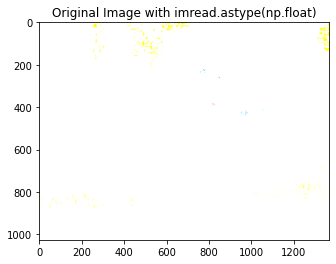

In [23]:
# Load
cat2 = imread(cwd + "/images/cat.jpg").astype(np.float)
print_typeshape(cat2)
# Plot
plt.figure(0)
plt.imshow(cat2)
plt.title("Original Image with imread.astype(np.float)")
plt.draw()

Type is <class 'imageio.core.util.Array'>
Shape is (1026, 1368, 3)


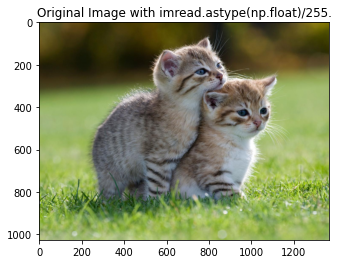

In [24]:
# Load
cat3 = imread(cwd + "/images/cat.jpg").astype(np.float)
print_typeshape(cat3)
# Plot
plt.figure(0)
plt.imshow(cat3/255.)
plt.title("Original Image with imread.astype(np.float)/255.")
plt.draw()

# Resize

Type is <class 'numpy.ndarray'>
Shape is (100, 100, 3)


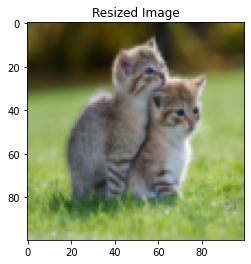

In [29]:
# Resize
catsmall = resize(cat, [100, 100, 3])
print_typeshape(catsmall)
# Plot
plt.figure(1)
plt.imshow(catsmall)
plt.title("Resized Image")
plt.draw()

# Grayscale

<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-30-e9f71417b0af>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(rgb.shape) is 3:


size of catsmallgray is (100, 100)
type of catsmallgray is <class 'numpy.ndarray'>


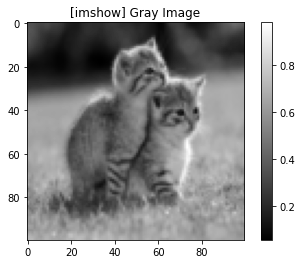

In [30]:
# Grayscale
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print ("Current Image if GRAY!")
        return rgb
catsmallgray = rgb2gray(catsmall)

print ("size of catsmallgray is %s" % (catsmallgray.shape,))
print ("type of catsmallgray is", type(catsmallgray))

plt.figure(2)
plt.imshow(catsmallgray, cmap=plt.get_cmap("gray"))
plt.title("[imshow] Gray Image")
plt.colorbar()
plt.draw()

# Reshape

In [31]:
# Convert to Vector
#한줄로 펴라
catrowvec = np.reshape(catsmallgray, (1, -1));
print ("size of catrowvec is %s" % (catrowvec.shape,))
print ("type of catrowvec is", type(catrowvec))

# Convert to Matrix
catmatrix = np.reshape(catrowvec, (100, 100));
print ("size of catmatrix is %s" % (catmatrix.shape,))
print ("type of catmatrix is", type(catmatrix))

size of catrowvec is (1, 10000)
type of catrowvec is <class 'numpy.ndarray'>
size of catmatrix is (100, 100)
type of catmatrix is <class 'numpy.ndarray'>


# Load from folder

In [32]:
# Load from Folder
cwd  = os.getcwd()
path = cwd + "/images/cats"
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]

# print ("Images in %s are: \n %s" % (path, os.listdir(path)))
print ("%d files in %s" % (len(os.listdir(path)), path))

# Append Images and their Names to Lists
imgs = []
names = []
for f in os.listdir(path):
    # For all files 
    ext = os.path.splitext(f)[1]
    # Check types 
    if ext.lower() not in valid_exts:
        continue
    fullpath = os.path.join(path,f)
    imgs.append(imread(fullpath))
    names.append(os.path.splitext(f)[0]+os.path.splitext(f)[1])
print ("%d images loaded" % (len(imgs))) 

38 files in d:\work\ML\jupyter\Tensorflow-101\notebooks/images/cats
38 images loaded


In [34]:
# Check
nimgs = len(imgs)
randidx = np.sort(np.random.randint(nimgs, size=3))
print ("Type of 'imgs': ", type(imgs))
print ("Length of 'imgs': ", len(imgs))
for curr_img, curr_name, i \
    in zip([imgs[j] for j in randidx]
           , [names[j] for j in randidx]
           , range(len(randidx))):
    print ("[%d] Type of 'curr_img': %s" % (i, type(curr_img)))
    print ("    Name is: %s" % (curr_name))
    print ("    Size of 'curr_img': %s" % (curr_img.shape,))    

Type of 'imgs':  <class 'list'>
Length of 'imgs':  38
[0] Type of 'curr_img': <class 'imageio.core.util.Array'>
    Name is: images (7).jpeg
    Size of 'curr_img': (193, 261, 3)
[1] Type of 'curr_img': <class 'imageio.core.util.Array'>
    Name is: images (8).jpeg
    Size of 'curr_img': (177, 284, 3)
[2] Type of 'curr_img': <class 'imageio.core.util.Array'>
    Name is: 다운로드 (3).jpeg
    Size of 'curr_img': (183, 275, 3)


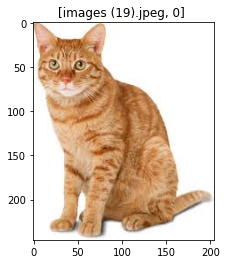

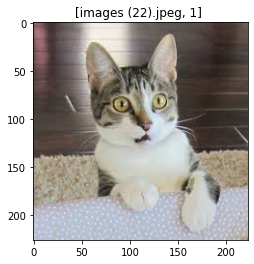

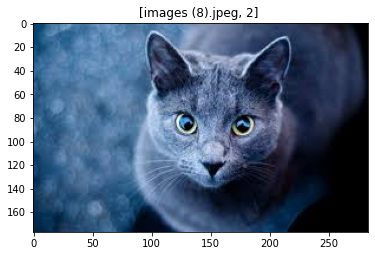

In [37]:
# Plot Images in 'imgs' list
nimgs = len(imgs)
randidx = np.sort(np.random.randint(nimgs, size=3))
for curr_img, curr_name, i \
    in zip([imgs[j] for j in randidx]
           , [names[j] for j in randidx], range(len(randidx))):
    plt.figure(i)
    plt.imshow(curr_img)
    plt.title("["+ curr_name +", " + str(i) + "] ")
    plt.draw() 

In [12]:
print "That was all!"

That was all!
